### 20팀 데이터 분석을 위한 juypter notebook입니다
#### 순서는 다음과 같습니다 : 

1. 와인 데이터
2. 미슐랭 레스토랑 데이터
3. 알코올 소비 데이터


*첫번째는 와인 데이터입니다*
와인 데이터의 양이 워낙에 방대(약 13만개)하기에, 저희 프로그램에 맞는 데이터들만을 추려 사용하겠습니다.
저희 프로그램은 사용자가 선호하는 맛에 따라서 와인을 추천해야하지만, 현재 데이터에는 다섯가지 기본 맛에 대한 척도는 존재하지 않습니다.
그 대신 description에 맛에 대한 묘사가 나와있기에 여러가지 키워드를 사용하여 **문자열 검색**을 통해 맛을 구분하는것을 목적으로 하겠습니다. 또한 와인 품종에 관해서도, 워낙에 많은 품종들이 있기에 red, white를 구분하기 위해서 와인 품종에 red, white과같은 직관적인 단어가 들어가는 경우와 5대 와인 품종인 Cabernet Sauvignon, Merlot, Pinot Noir, chardonnay, Sauvignon Blanc가 들어간 경우만 포함하도록 하겠습니다!



In [72]:
import numpy as np
# pandas
import pandas as pd 
# seaborn
import seaborn as sns
# matplotlib
import matplotlib.pyplot as plt
import squarify
import missingno as msno
from collections import Counter
import selenium as sl

%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size':12})

### (1)Load Dataset

In [47]:
wine_alpha =pd.read_csv('./winemag-data-130k-v2.csv', index_col = 0)
wine_beta = pd.read_csv('./winemag-data_first150k.csv', index_col = 0)
print(wine_alpha.size)
print(wine_beta.size)

1689623
1509300


In [70]:
wine_name = wine_alpha['title']

### 일차적으로는 맛 검색에 유리하게 특정 키워드들이 description field에 포함되어있는 와인들로 추려냅니다

In [55]:
searchfor = ['sweetness', 'Semidry', 'moderately tannic', 'light tannic', 'heavy', 'fruity', 'vanila']
#어떤 키워드가 많이 들어갔는지 확인 후 상위 키워드만 검색하자
#현재 상위 키워드 디스코드에 업데이트 해놓았습니다! 보시고 괜찮은 단어들로 searchfor에 넣으면 될 것 같아요!
new_data = wine_alpha[wine_alpha['description'].str.contains('|'.join(searchfor), na = False)]
new_data2 = wine_beta[wine_beta['description'].str.contains('|'.join(searchfor), na = False)]
print(new_data.size)
print(new_data2.size)

175981
153820


### 두 번째로는 레드, 화이트와인의 구분을 위해 품종에 red, white가 이름에 포함된 품종과 유명 품종(샤르도네 등)
### 총 데이터 개수가 13만개 => 1만개로 줄어든 것을 확인할 수 있습니다.

In [49]:
searchfor_type = ['Red', 'White', 'Cabernet Sauvignon', 'Merlot', 'Pinot Noir', 'chardonnay', 'Sauvignon Blanc'] 
final_data = new_data[new_data['variety'].str.contains('|'.join(searchfor_type), na = False)]
final_data2 = new_data2[new_data2['variety'].str.contains('|'.join(searchfor_type), na = False)]
print(final_data.size)
print("=======================")
print(final_data2.size)

737724
666990


### 총 13만개의 데이터중에서 12만개를 걸러내고, 약 1만개만의 데이터를 남긴것을 확인할 수 있습니다. 

In [50]:
print(final_data['points'].mean())
print(final_data2['points'].mean())

88.56555297102982
88.09024123300199


### 와인 점수의 평균은 87.5점입니다. 고품질의 와인만을 제공하기 위해 값이 90점 이상인 와인들만 추천하겠습니다.

In [51]:
final_data = final_data[(final_data['points'] >= 90)]
final_data2 = final_data2[(final_data2['points'] >= 90)]

In [56]:
text = final_data['description']
text_str = ""
for i in text :
    text_str += i
text_arr =  text_str.strip('.,').split(" ")
for w, c in Counter(text_arr).most_common(200) :
    print(w, c)


and 68103
the 36446
of 35012
a 29584
with 20531
is 19184
this 14557
in 13525
wine 12467
to 11129
from 8547
The 8473
black 7559
it 7493
on 7135
that 7098
flavors 6236
fruit 5918
tannins 5185
It 4930
are 4924
for 4795
but 4677
has 4567
Drink 4561
by 4298
Cabernet 4129
ripe 4100
its 4023
cherry 3971
as 3908
aromas 3832
It's 3732
blend 3582
red 3334
rich 3266
palate 3218
through 3101
acidity 3016
an 2932
dark 2909
wine, 2647
shows 2387
at 2278
cherry, 2228
will 2209
notes 2208
spice 2171
This 2169
it's 2075
well 2055
blackberry 1936
firm 1919
plum 1864
oak 1859
offers 1858
tannins. 1796
wine. 1764
fruits 1759
more 1758
finish 1743
fruit, 1732
into 1724
very 1697
flavors. 1692
Sauvignon 1657
all 1622
full 1611
A 1609
dried 1606
juicy 1588
berry 1577
while 1563
Pinot 1562
be 1529
nose 1522
chocolate 1492
structure 1467
fresh 1463
texture 1461
drink 1440
great 1433
fine 1427
palate, 1426
concentrated 1399
dense 1397
flavors, 1379
over 1371
sweet 1367
now 1340
new 1318
raspberry 1316
acidity. 

### 값 또한 중요합니다. 와인의 값이 천차만별이므로 너무 비싸지 않게 병당 1000달러 이내로 제한하겠습니다.

In [57]:
final_data = final_data[(final_data['price'] <= 1000)]
final_data2 = final_data2[(final_data2['price'] <= 1000)]

1. 마지막 작업중, final_data에는 title 값(와인의 이름)이 없다는 것을 확인했습니다. 따라서 사용이 힘들것으로 판단됩니다.
2. 또한 와인의 이름은 필수적으로 알아야 하므로 마지막으로 와인 이름에 NaN 값이 들어있는 데이터들을 걸러내겠습니다.

### 남은 데이터의 총 개수는 약 1100개입니다.

In [58]:
new_data_to_export = final_data
new_data_to_export = new_data_to_export[new_data_to_export['title'].notnull()]
new_data_to_export = new_data_to_export.reset_index()
print(new_data_to_export)

        index       country  \
0         123     Australia   
1         124            US   
2         125  South Africa   
3         127        France   
4         129  South Africa   
...       ...           ...   
20620  129956   New Zealand   
20621  129958   New Zealand   
20622  129960      Portugal   
20623  129963        Israel   
20624  129967            US   

                                             description  \
0      The blend is roughly two-thirds Shiraz and one...   
1      This sophisticated wine is mostly Cabernet Sau...   
2      Etienne Le Riche is a total Cabernet specialis...   
3      Attractive mid-gold color with intense aromas ...   
4      A big, black bruiser of a wine that has black ...   
...                                                  ...   
20620  The blend is 44% Merlot, 33% Cabernet Sauvigno...   
20621  This blend of Cabernet Sauvignon-Merlot and Ca...   
20622  Fresh and fruity, this is full of red cherry f...   
20623  A bouquet of black c

### 완성! 이제 두 번째로 미쉐린 레스토랑 데이터를 concatenate 하겠습니다.

In [59]:
michelin_one = pd.read_csv("./one-star-michelin-restaurants.csv") 
michelin_two = pd.read_csv("./two-stars-michelin-restaurants.csv")
michelin_three = pd.read_csv("./three-stars-michelin-restaurants.csv")

### 그에 앞서, 가격 정보를 제공하기위해 가격 정보/홈페이지가 NaN인 레스토랑은 드랍 처리 하겠습니다.

In [60]:
michelin_one = michelin_one[(michelin_one['price'].notnull()) & (michelin_one['url'].notnull())]
michelin_two = michelin_two[(michelin_two['price'].notnull()) & (michelin_two['url'].notnull())]
michelin_three = michelin_three[(michelin_three['price'].notnull()) & (michelin_three['url'].notnull())]

### 또한 해당 레스토랑이 몇 성인지에 대한 정보가 없기에 one, two, three에 각각 star라는 항목을 추가하여 값을 맞춰주도록 하겠습니다.


In [61]:
michelin_one["star"] = 1
michelin_two["star"] = 2
michelin_three["star"] = 3

### 이제 마지막으로 세 배열을 concatenate 해주겠습니다. 총 519개의 레스토랑 정보가 저장되었습니다.

In [62]:
final_michelin = pd.concat([michelin_one, michelin_two, michelin_three])
final_michelin = final_michelin.reset_index()
print(final_michelin)

     index                          name  year   latitude  longitude  \
0        0                  Kilian Stuba  2019  47.348580   10.17114   
1        1                 Pfefferschiff  2019  47.837870   13.07917   
2        2                     Esszimmer  2019  47.806850   13.03409   
3        3                    Carpe Diem  2019  47.800010   13.04006   
4        4                        Edvard  2019  48.216503   16.36852   
..     ...                           ...   ...        ...        ...   
514     26                       La Yeon  2019  37.555813  127.00517   
515     27                          Gaon  2019  37.522650  127.03595   
516     28                      Frantzén  2019  59.334180   18.05812   
517     29                     Le Palais  2019  25.049496  121.51674   
518     30  The Inn at Little Washington  2019  38.713623  -78.16208   

                 city         region zipCode          cuisine  price  \
0      Kleinwalsertal        Austria   87568         Creative  

### 세 번째로 한국인과 외국인의 주류 섭취량을 비교한 그래프를 그려보겠습니다.

In [63]:
drink = pd.read_csv('./alcohol-consumption-vs-gdp-per-capita.csv')

In [64]:
korea = drink[(drink['Code'] == "KOR") & (drink['Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)'].notnull()) & (drink['Year'] == 2015) ]
japan = drink[(drink['Code'] == "JPN") & (drink['Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)'].notnull()) & (drink['Year'] == 2015) ]
usa = drink[(drink['Code'] == "USA") & (drink['Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)'].notnull()) & (drink['Year'] == 2015) ]
world = drink[(drink['Code'] == "OWID_WRL") & (drink['Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)'].notnull()) & (drink['Year'] == 2015) ]
asia = drink[(drink['Entity'] == "East Asia & Pacific") & (drink['Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)'].notnull()) & (drink['Year'] == 2015) ]

### 2015년 기준으로 한국, 일본, 세계, 미국, 아시아의 값을 추출해 array를 만들고 비교하겠습니다.

Text(0, 0.5, 'Alcohol Consumption')

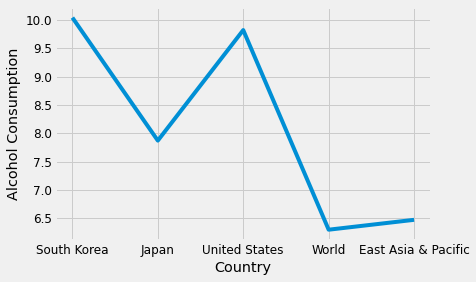

In [65]:
graph_info = pd.concat([korea, japan, usa, world, asia])
figure, axx = plt.subplots()
axx.plot(graph_info['Entity'], graph_info["Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)"], label = "height")
axx.set_xlabel("Country")
axx.set_ylabel("Alcohol Consumption")

### 보시다시피, 한국이 상대적으로 주류를 많이 소비하는 모습을 볼 수 있습니다.

### 네 번째로 와인의 다양성을 보여주는 그래프들을 그려보겠습니다.

<AxesSubplot:>

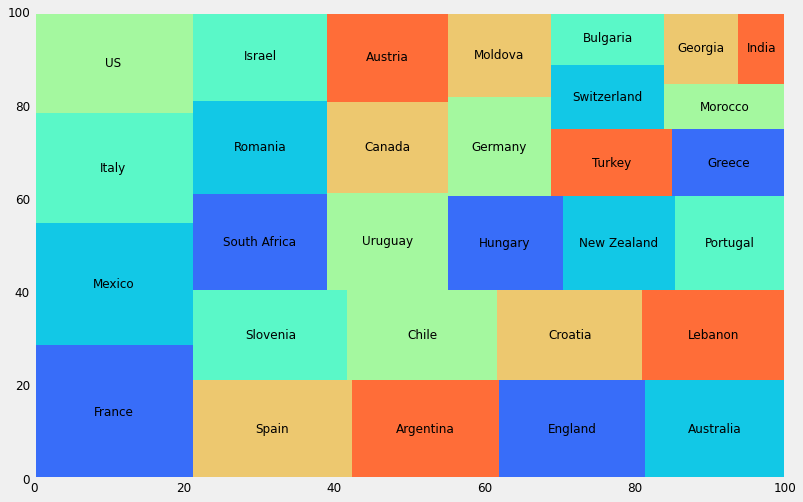

In [66]:
cnt = new_data_to_export.groupby(['country',])['price'].mean().sort_values(ascending=False).to_frame()
plt.figure(figsize=(12,8))
squarify.plot(cnt['price'].fillna(0.1),color=sns.color_palette('rainbow'),label=cnt.index)

Text(0.5, 1.0, 'Boxplot of price')

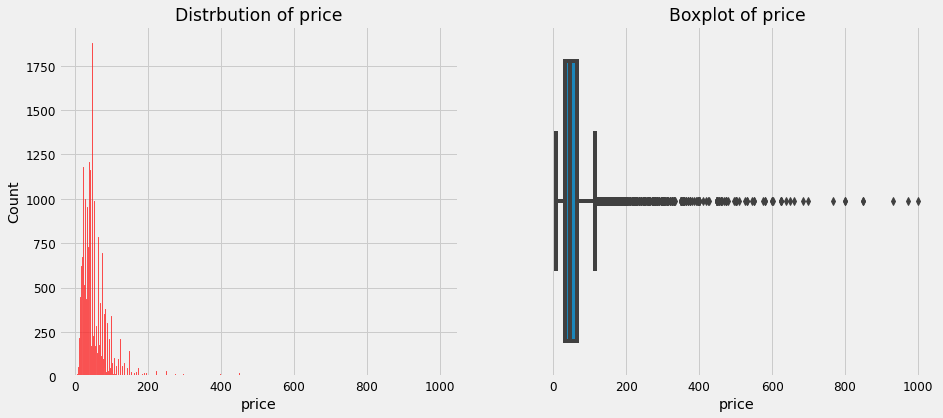

In [67]:
f, ax = plt.subplots(1,2,figsize=(14,6))
ax1,ax2 = ax.flatten()
sns.histplot(new_data_to_export['price'].fillna(new_data_to_export['price'].mean()),color='r',ax=ax1)
ax1.set_title('Distrbution of price')
sns.boxplot(x = new_data_to_export['price'], ax=ax2)
ax2.set_ylabel('')
ax2.set_title('Boxplot of price')

### 다섯 번째로, 주류 시장의 팽창을 나타내는 그래프를 나타내어 보겠습니다.

Text(0, 0.5, 'Consumption in Asia')

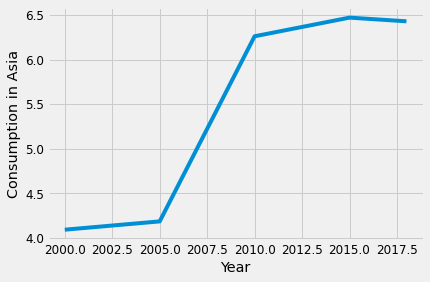

In [68]:
asia = drink[(drink['Entity'] == "East Asia & Pacific") & (drink['Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)'].notnull())]
figure2, axx2 = plt.subplots()
axx2.plot([2000, 2005, 2010, 2015, 2018],asia["Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)"], label = "height")
axx2.set_xlabel("Year")
axx2.set_ylabel("Consumption in Asia")

마지막으로 이 데이터들을 전부 export 해주겠습니다.

In [69]:
#export required
new_data_to_export.to_csv('./wine_data_final.csv') #와인데이터 줄인거
final_michelin.to_csv('./michelin_final.csv') #미슐랭데이터 합친거
graph_info.to_csv('./korean_consumption_compared.csv') #한국이랑 다른나라 비교 데이터
new_data_to_export.to_csv('./wine_data_final.csv')
asia.to_csv('./asia_market_expansion.csv') #아시아 시장의 팽창 데이터

## 다들 부족한 코드 읽으시느라 고생하셨습니다! :D 데이터 분석이고 판다스고 다 처음이라 엉망으로 한거같은데 지적사항 언제든지 환영합니다!